# 1. Word clouds

We start by importing the `Emails.csv` data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [2]:
emails_csv = pd.read_csv('hillary-clinton-emails/Emails.csv')
emails_csv.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


In this exercise we need only fields with textual content, i.e. `ExtractedBodyText` and `ExtractedSubject`

In [3]:
raw_corpus = ' '.join(list(emails_csv['ExtractedBodyText'].dropna()) + list(emails_csv['ExtractedSubject'].dropna()))
raw_corpus[:100]

'B6\nThursday, March 3, 2011 9:45 PM\nH: Latest How Syria is aiding Qaddafi and more... Sid\nhrc memo sy'

Then we generate the cloud without any preprocessing and display it.

In [143]:
wc = WordCloud().generate(raw_corpus)

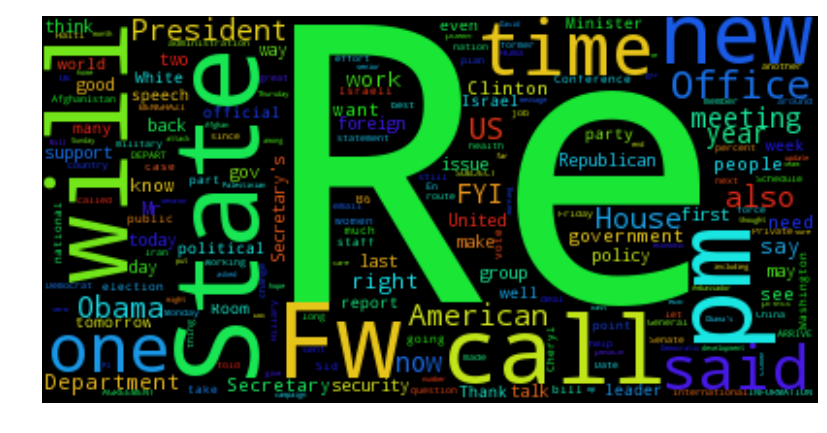

In [144]:
plt.subplots(figsize=(10,15))
plt.imshow(wc)
plt.axis("off")
plt.show()

One obvious problem is that the response and forward tags in e-mails 'Re' and 'Fw' are very present in this correspondence. However, on top of this, we also get a lot of very frequent words which don't reveal much about the content of the e-mails ('call', 'will', 'said', 'also', 'think', ...). Some of the less frequent elements of this word cloud are also punctation marks.

## Preprocessing the corpus

In order to get rid of unwanted and uninformative words in our word cloud representation of the corpus, we preprocess the raw text in the following ways. 
- tokenization
- lowerization (everything to lower case)
- stopword removal
- stemming or lemmatization

### tokenization

Here the corpus, which is just one big string so far, is split into tokens (think words)

In [56]:
from nltk.tokenize import TreebankWordTokenizer

In [57]:
tokenized = TreebankWordTokenizer().tokenize(raw_corpus)
tokenized[:5]

['B6', 'Thursday', ',', 'March', '3']

### lowerization

We convert everything to lowercase, so as to have case-sensitive variations of the same words match.

In [58]:
lowered = [x.lower() for x in tokenized]

### Stopword removal

In order to get rid of stopwords (the, a, an, if, etc.), we use the list provided by nltk. We add some specific words to be removed relevant to this corpus (i.e. 're', 'pm', 'fw'), and a list of punctuation. These three sources are then used to filter out uninformative tokens for the wordcloud. 

In [59]:
from nltk.corpus import stopwords
from string import punctuation

In [60]:
custom_filter = ['re', 'b6', 'pm', 'fw', 'mr', 'mrs', 'ms', 'n\\\'t', '...']
sw = stopwords.words('english') + list(punctuation) + custom_filter
filtered = list(filter(lambda x: x not in sw, lowered))
filtered[:10]

['thursday',
 'march',
 '3',
 '2011',
 '9:45',
 'h',
 'latest',
 'syria',
 'aiding',
 'qaddafi']

### stemming

Stemming consists in chopping off the suffix of the word that is due to variations such as inflexion. For example **governing** and **government** would probably be stemmed to **govern**.

There are several different stemmers in NLTK, based on different algorithms (Porter, Lancaster, Snowball). But for this case, there is no need for an extensive comparison of them.

In [61]:
from nltk.stem.snowball import SnowballStemmer

In [62]:
stemmer = SnowballStemmer(language="english")
stemmed = [stemmer.stem(x) for x in filtered]

In [63]:
stemmed[:30]

['thursday',
 'march',
 '3',
 '2011',
 '9:45',
 'h',
 'latest',
 'syria',
 'aid',
 'qaddafi',
 'sid',
 'hrc',
 'memo',
 'syria',
 'aid',
 'libya',
 '030311.docx',
 'hrc',
 'memo',
 'syria',
 'aid',
 'libya',
 '030311.docx',
 'march',
 '3',
 '2011',
 'hillari',
 'thx',
 'h',
 'hrod17']

Let's take a look at the word cloud we get aftet these preprocessing steps. 

In [13]:
wc = WordCloud().generate(' '.join(stemmed))

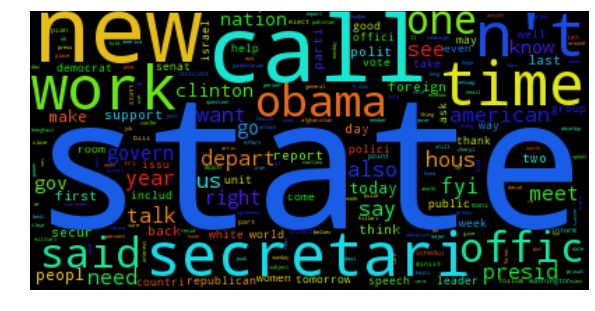

In [14]:
plt.subplots(figsize=(10,15))
plt.imshow(wc)
plt.axis("off")
plt.show()

The results we get are more relevant, but many words represented here aren't actual english words, and are an agglomeration of different terms (president, presidency, preside $\rightarrow$ presid) 

### lemmatization

The goal of lemmatization is to reduce words to their root form, taking into account morphological knowledge of the words. It is a more "proper" way of handling inflectional and derivational forms of words.

In [64]:
from nltk.stem import WordNetLemmatizer

In [65]:
lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(x) for x in filtered]

In [17]:
wc = WordCloud().generate(' '.join(lemmatized))

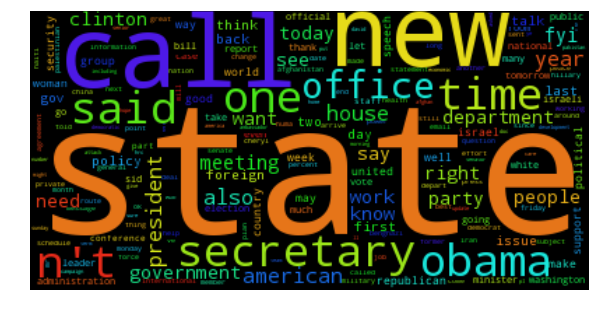

In [18]:
plt.subplots(figsize=(10,15))
plt.imshow(wc)
plt.axis("off")
plt.show()

The result, as we see, is similar, but this times gives us english words mostly, which is more understandable to humans.

# 2. Mentions of world countries

The preprocessing for this task can be only tokenization because the rest are not so relevant. 

One aspect that we need to take into account is that some very common words might be mistaken for countries by `pycountry` (e.g. 'be', 'us'). We filter out these tokens when written in their lowerized version because on the assumption that they are probably used as common words. 

In [4]:
import pycountry

In [9]:
def find_all_countries(string):
    if not string:
        return []
    tokens = TreebankWordTokenizer().tokenize(string)
    filtered_token = ['pm', 'Us', 'us', 'Is', 'is', 'and', 'Be', 'be', 'PM'] 
    def lookup(w):
        if w in filtered_token:
            return None
        try:
           return pycountry.countries.lookup(w).alpha_3
        except LookupError:
            return None
    return list(set(filter(lambda x: x, map(lookup, tokens))))

In [10]:
emails_csv['countries'] = emails_csv['ExtractedBodyText'].dropna().apply(lambda x: find_all_countries(x))

In [11]:
emails_csv['countries'].head(10)

0                NaN
1              [LBY]
2                 []
3                NaN
4              [LBY]
5    [MYS, TON, NOR]
6                NaN
7              [LBY]
8                 []
9         [MYS, LBY]
Name: countries, dtype: object

### Polarity scores
We produce polarity scores based on the `demo_vader_instance` function in the `nltk.sentiment.util` module.

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
vader_analyzer = SentimentIntensityAnalyzer()

def polarity(row):
    pol = vader_analyzer.polarity_scores(row.ExtractedBodyText)
    return pd.Series({'countries': row.countries, 'pos': pol['pos'], 'neg': pol['neg'] })

First we compute the polarity for each row in the set (i.e. each e-mail).

In [13]:
results = emails_csv.dropna()[['countries', 'ExtractedBodyText']]
results = results.apply(lambda x: polarity(x), axis=1)

In [14]:
from collections import defaultdict

We then aggregate the polarity scores by country, and by positive and negative scores.

In [15]:
countryPos = defaultdict(float)
countryNeg = defaultdict(float)

def agg(x):
    for c in x['countries']:
        countryPos[c] += x['pos']
        countryNeg[c] += x['neg']        
    

results[['pos', 'neg', 'countries']].dropna().apply(agg, axis=1);

Let's join the two dictionaries into a common dataframe, and sort it according to positive scores.

In [33]:
df_pos = pd.DataFrame.from_dict(countryPos, orient='index')
df_neg = pd.DataFrame.from_dict(countryNeg, orient='index')
df_posneg = df_pos.join(df_neg, rsuffix='neg')
df_posneg.columns = ['Positive', 'Negative']
df_posneg = df_posneg.sort_values('Positive', ascending=False)

In [42]:
# Split into smaller df
half = int(df_posneg.shape[0] / 2)
posneg1, posneg2 = df_posneg[:half], df_posneg[half:],

To get a more understandable result, let's plot the country polarity scores in two parts, in descending order, for the *positive* values.

Below is plotted the first of these two parts. *Beware* the axes on the positive and negative scores are **not** on the same scale.

/home/alexis/Applications/anaconda3/lib/python3.5/site-packages/pandas/tools/plotting.py:3369: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  "the passed axes is being cleared", UserWarning)


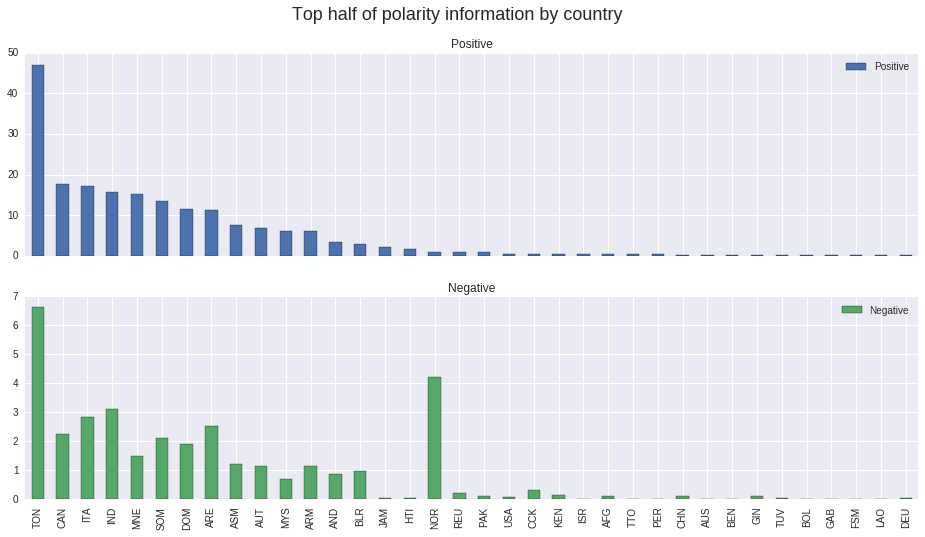

In [49]:
fig, ax = plt.subplots(figsize=(16,8)) # Create matplotlib figure
posneg1.plot(kind='bar', grid=True, subplots=True, sharex=True, ax=ax)
fig.suptitle("Top half of polarity information by country", fontsize=18)
plt.show()

And here is the second half of the data. Again, the axes are scaled differently with regard to the top figure, and between the two subfigures here.

/home/alexis/Applications/anaconda3/lib/python3.5/site-packages/pandas/tools/plotting.py:3369: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  "the passed axes is being cleared", UserWarning)


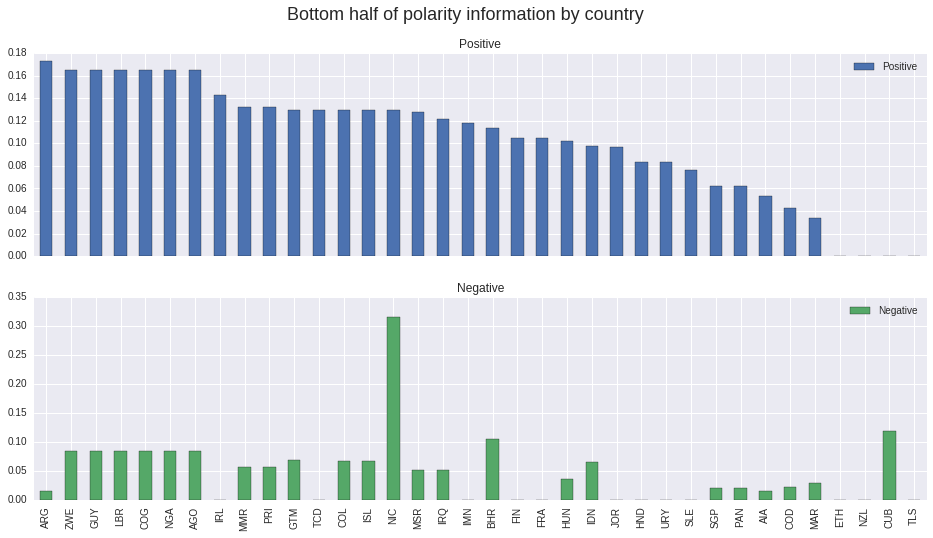

In [46]:
fig, ax = plt.subplots(figsize=(16,8)) # Create matplotlib figure
posneg2.plot(kind='bar', grid=True, subplots=True, sharex=True, ax=ax)
fig.suptitle("Bottom half of polarity information by country", fontsize=18)
plt.show()

# 3. Topic modeling

In what follows, we will use the Latent Dirichlet allocation (LDA) topic model that generates topics based on word frequency from a set of documents. In our case, each e-mail with the subject and body is considered as a document. 

In [67]:
import gensim
from gensim import models, corpora

We need to construct a document-term matrix from the list of e-mails. We apply the same pre-processing steps that we performed in exercise 1 to each e-mail.

In [68]:
emails_csv['Text'] = emails_csv['ExtractedBodyText'] + emails_csv['ExtractedSubject']
emails = list(emails_csv['Text'].dropna())

In [69]:
texts = []
sw = sw + ['would', 'also', "n\'t"]
for email in emails:
    # Preprocessing steps used in exercise 1
    token = TreebankWordTokenizer().tokenize(email)
    lower = [x.lower() for x in token]
    filt = list(filter(lambda x: x not in sw, lower))
    lemma = [lemmatizer.lemmatize(x) for x in filt]
    # keeping only words with more than 2 characters and without a backslash
    long = list(filter(lambda x: ((len(x)>2) & ("\\" not in x)), lemma))
    texts.append(long)

The Dictionary() function assigns a unique ID to each token. The doc2bow() function converts each email to a vector, which is a series of tuples (term ID, term frequency).

In [70]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

Now we can generate the LDA model:

In [75]:
lda = models.LdaModel(corpus, num_topics=5, id2word = dictionary)

In [77]:
for i in range(0, lda.num_topics):
    print("---", lda.print_topic(i))
    print()

--- 0.016*"call" + 0.005*"get" + 0.004*"see" + 0.004*"time" + 0.004*"know" + 0.004*"pls" + 0.003*"need" + 0.003*"could" + 0.003*"one" + 0.003*"tomorrow"

--- 0.008*"obama" + 0.005*"new" + 0.005*"party" + 0.004*"republican" + 0.004*"president" + 0.004*"state" + 0.004*"american" + 0.003*"israel" + 0.003*"said" + 0.003*"one"

--- 0.022*"office" + 0.020*"secretary" + 0.011*"meeting" + 0.010*"state" + 0.009*"room" + 0.008*"department" + 0.007*"arrive" + 0.007*"route" + 0.007*"depart" + 0.006*"private"

--- 0.008*"state" + 0.005*"u.s." + 0.004*"new" + 0.004*"time" + 0.003*"security" + 0.003*"secretary" + 0.003*"american" + 0.003*"one" + 0.003*"president" + 0.003*"nuclear"

--- 0.004*"think" + 0.004*"fyifw" + 0.004*"state" + 0.004*"talk" + 0.004*"like" + 0.003*"2010" + 0.003*"want" + 0.003*"work" + 0.003*"get" + 0.003*"speech"

